# Female Victims. Unsolved Cases. Alabama 1991-1997

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [4]:
map_data = pd.read_csv('../data/SHR65_22.csv', index_col=0)
map_data.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,1,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Rural Alaska
197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,"Mobile, AL"


In [6]:
df = map_data[(map_data['VicSex'] == 'Female')
             & (map_data['Solved'] == 'No')
             & (map_data['State'] == 'Alabama')
             & (map_data['Year'].between(1991, 1997))]
df.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
199101001AL00301,"Montgomery, AL",AL00301,Alabama,Montgomery,Municipal police,FBI,No,1991,January,1,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Friend,Other arguments,NaN,0,0,12993.0,"Montgomery, AL"
199101001AL04701,"Madison, AL",AL04701,Alabama,Huntsville,Municipal police,FBI,No,1991,January,1,...,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Circumstances undetermined,NaN,0,0,12993.0,"Huntsville, AL"
199101001AL05500,"Pike, AL",AL05500,Alabama,Pike County,Sheriff,FBI,No,1991,January,1,...,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Other arguments,NaN,0,0,12993.0,Rural Alabama
199101001AL06400,"Walker, AL",AL06400,Alabama,Walker County,Sheriff,FBI,No,1991,January,1,...,Unknown,Unknown or not reported,Knife or cutting instrument,Relationship not determined,Other arguments,NaN,0,0,12993.0,"Birmingham-Hoover, AL"
199101002AL00100,"Jefferson, AL",AL00100,Alabama,Jefferson County,Sheriff,FBI,No,1991,January,2,...,Unknown,Unknown or not reported,"Personal weapons, includes beating",Relationship not determined,Circumstances undetermined,NaN,0,0,12993.0,"Birmingham-Hoover, AL"


In [10]:
df.groupby('CNTYFIPS').count()['Ori']

CNTYFIPS
Autauga, AL        3
Baldwin, AL        3
Barbour, AL        2
Butler, AL         1
Calhoun, AL        8
Chambers, AL       2
Chilton, AL        2
Coffee, AL         1
Colbert, AL        1
Cullman, AL        1
Dale, AL           1
Dallas, AL         2
Etowah, AL         3
Franklin, AL       1
Geneva, AL         1
Henry, AL          1
Houston, AL        2
Jefferson, AL     82
Lauderdale, AL     2
Lawrence, AL       2
Lee, AL            1
Limestone, AL      2
Lowndes, AL        1
Macon, AL          4
Madison, AL        7
Marengo, AL        1
Marshall, AL       1
Mobile, AL        35
Montgomery, AL    28
Morgan, AL         2
Perry, AL          2
Pike, AL           1
St. Clair, AL      3
Talladega, AL      3
Tuscaloosa, AL     7
Walker, AL         3
Name: Ori, dtype: int64

Text(0.5, 1.0, 'Cases by City')

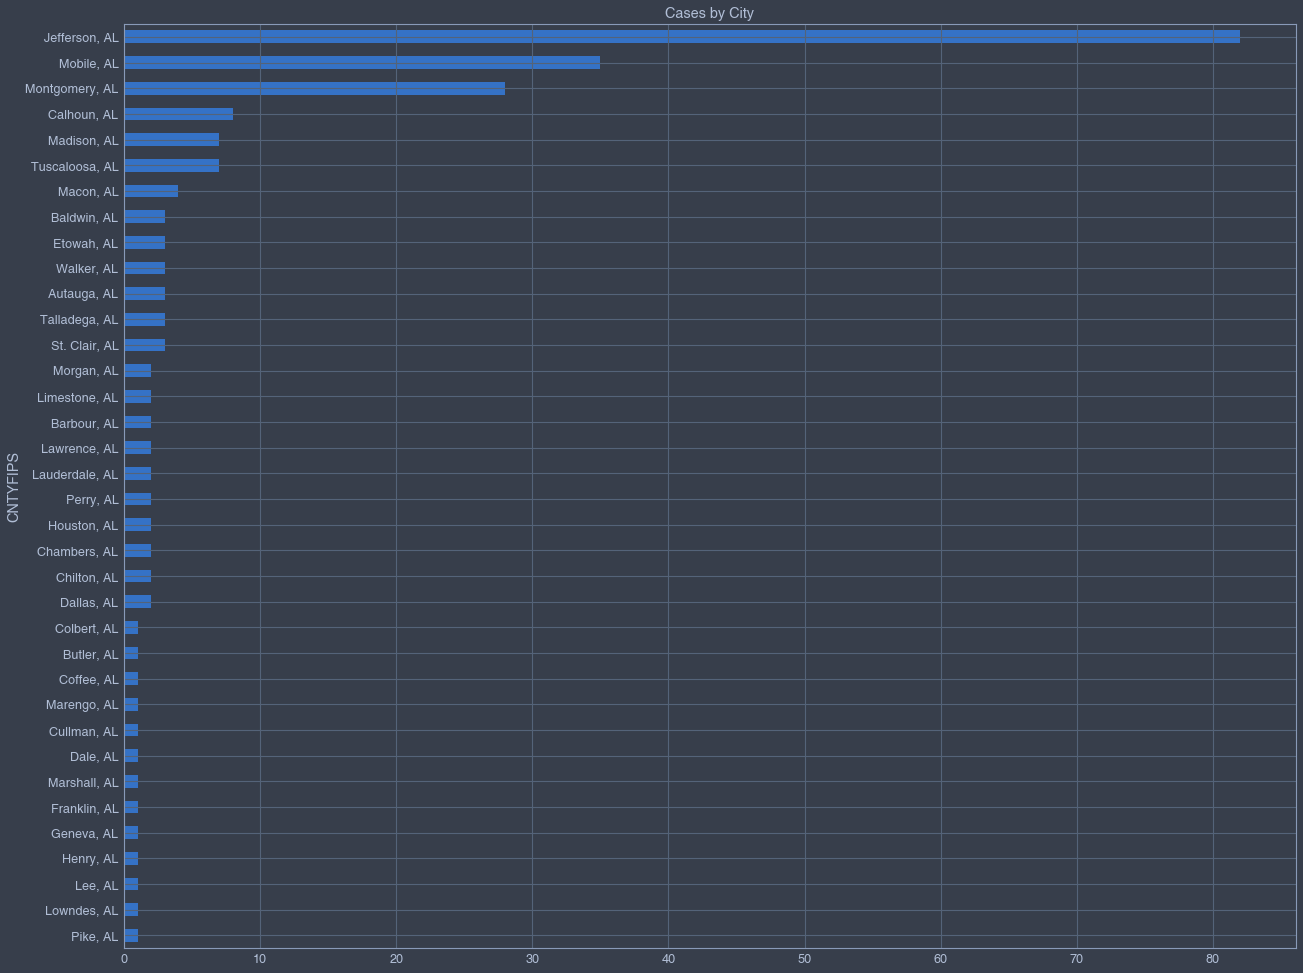

In [9]:
fig, ax = plt.subplots(figsize=(21, 17))

df.groupby('CNTYFIPS').count().sort_values(by='Ori', ascending=True)['Ori'].plot(kind='barh', ax=ax)
ax.set_title('Cases by City')

In [13]:
jefferson = df[df['CNTYFIPS'] == 'Jefferson, AL']
mobile = df[df['CNTYFIPS'] == 'Mobile, AL']
montgomery = df[df['CNTYFIPS'] == 'Montgomery, AL']

Text(0.5, 1.0, 'Montgomery, AL')

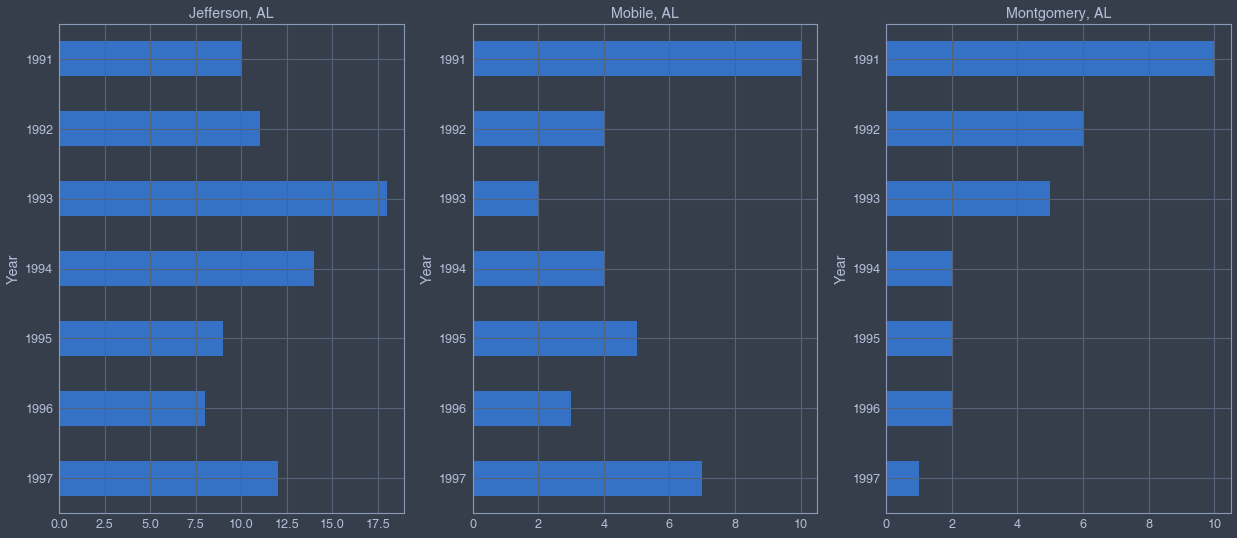

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(21, 9))

jefferson.groupby('Year').count()['Ori'].plot(kind='barh', ax=ax[0]).invert_yaxis()
ax[0].set_title('Jefferson, AL')

mobile.groupby('Year').count()['Ori'].plot(kind='barh', ax=ax[1]).invert_yaxis()
ax[1].set_title('Mobile, AL')

montgomery.groupby('Year').count()['Ori'].plot(kind='barh', ax=ax[2]).invert_yaxis()
ax[2].set_title('Montgomery, AL')